In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# from sklearn import tree
import pandas as pd
import numpy as np

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [4]:
y = pd.get_dummies(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
rf = RandomForestClassifier()

In [7]:
rf.fit(X_train, y_train)

/home/cory/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
y_pred = rf.predict(X_test)

In [9]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [10]:
dt = rf.estimators_[0]

In [26]:
tree.export_graphviz(dt, out_file='decision_tree.dot', feature_names=iris.feature_names)

In [27]:
import pydot

In [28]:
(graph, ) = pydot.graph_from_dot_file('decision_tree.dot')

In [29]:
graph.write_png('decision_tree.png')

In [30]:
from PIL import Image

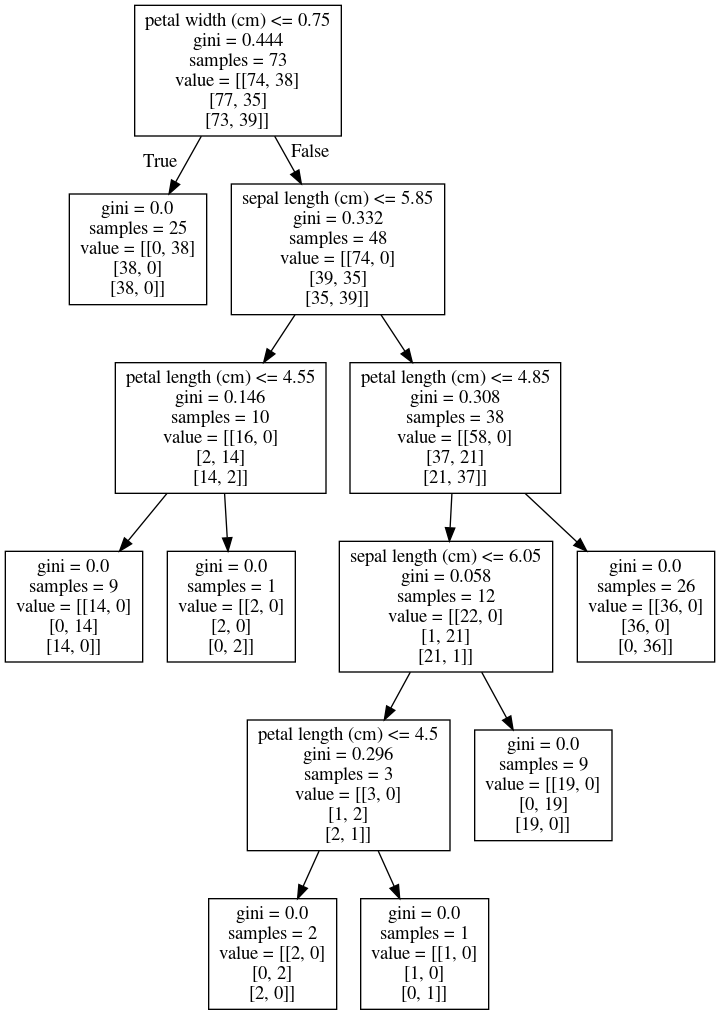

In [31]:
Image.open('decision_tree.png')